# Plotting Approximate Stability Regions

In [1]:
import numpy as np
import matplotlib.pyplot as pt

from cmath import exp, pi

In [2]:
def approximate_stability_region_1d(step_function, make_k, prec=1e-5):
    def is_stable(k):
        y = 1
        for i in range(20):
            if abs(y) > 2:
                return False
            y = step_function(y, i, 1, lambda t, y: k*y)
        return True
    
    def refine(stable, unstable):
        assert is_stable(make_k(stable))
        assert not is_stable(make_k(unstable))
        while abs(stable-unstable) > prec:
            mid = (stable+unstable)/2
            if is_stable(make_k(mid)):
                stable = mid
            else:
                unstable = mid
        else:
            return stable

    mag = 1
    if is_stable(make_k(mag)):
        mag *= 2
        while is_stable(make_k(mag)):
            mag *= 2

            if mag > 2**8:
                return mag
        return refine(mag/2, mag)
    else:
        mag /= 2
        while not is_stable(make_k(mag)):
            mag /= 2

            if mag < prec:
                return mag
        return refine(mag, mag*2)

In [3]:
def plot_stability_region(center, stepper):
    def make_k(mag):
        return center+mag*exp(1j*angle)

    stab_boundary = []
    for angle in np.linspace(0, 2*np.pi, 100):
        stable_mag = approximate_stability_region_1d(stepper, make_k)
        stab_boundary.append(make_k(stable_mag))
        
    stab_boundary = np.array(stab_boundary)
    pt.grid()
    pt.axis("equal")
    pt.plot(stab_boundary.real, stab_boundary.imag)

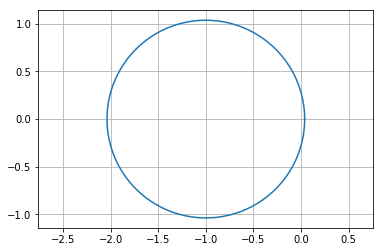

In [4]:
def fw_euler_step(y, t, h, f):
    return y + h * f(t, y)

plot_stability_region(-1, fw_euler_step)

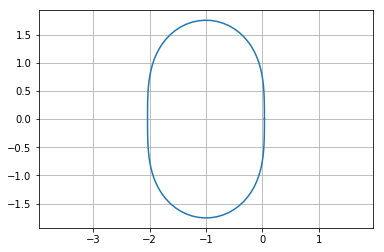

In [5]:
def heun_step(y, t, h, f):
    yp1_fw_euler =  y + h * f(t, y)
    return y + 0.5*h*(f(t, y) + f(t+h, yp1_fw_euler))

plot_stability_region(-1, heun_step)

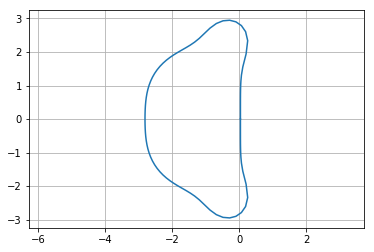

In [6]:
def rk4_step(y, t, h, f):
    k1 = f(t, y)
    k2 = f(t+h/2, y + h/2*k1)
    k3 = f(t+h/2, y + h/2*k2)
    k4 = f(t+h, y + h*k3)
    return y + h/6*(k1 + 2*k2 + 2*k3 + k4)

plot_stability_region(-1, rk4_step)